In [120]:
import pandas as pd
data=pd.read_csv("ibm.csv")

In [121]:
data.head()

,Unnamed: 0,Dates,Time,Week,Count
0,27,2022-02-02,09:00:00,3,69
1,28,2022-02-02,09:20:00,3,188
2,29,2022-02-02,09:40:00,3,177
3,30,2022-02-02,10:00:00,3,67
4,31,2022-02-02,10:20:00,3,62


In [122]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [123]:
data.head()

,Dates,Time,Week,Count
0,2022-02-02,09:00:00,3,69
1,2022-02-02,09:20:00,3,188
2,2022-02-02,09:40:00,3,177
3,2022-02-02,10:00:00,3,67
4,2022-02-02,10:20:00,3,62


In [124]:
data['Count'] = data['Count'].fillna(0).astype(int)

In [125]:
def convert(a):
    a = str(a)  # cast to string
    b = a[0:2]+"."+a[3:5] # last four characters
    return float(b)

data['Time'] = data['Time'].apply(convert)

In [126]:
def convert(a):
    a = str(a)  # cast to string
    b = a[5:7]+"."+a[8:10] # last four characters
    return float(b)

data['Dates'] = data['Dates'].apply(convert)

In [127]:
data.head()

,Dates,Time,Week,Count
0,2.02,9.0,3,69
1,2.02,9.2,3,188
2,2.02,9.4,3,177
3,2.02,10.0,3,67
4,2.02,10.2,3,62


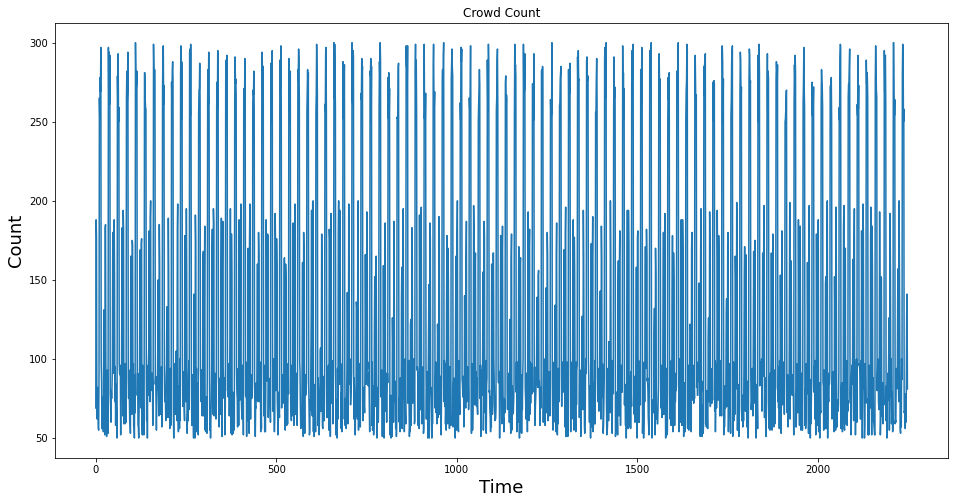

In [128]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))
plt.title('Crowd Count')
plt.plot(data['Count'])
plt.xlabel('Time',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

In [129]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
df=data.copy()
df.drop(['Count'],axis=1,inplace=True)
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Date','Time','Week'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,Date,Time,Week
0,0.0,0.000,0.333333
1,0.0,0.025,0.333333
2,0.0,0.050,0.333333
3,0.0,0.125,0.333333
4,0.0,0.150,0.333333


In [130]:
import numpy as np

In [131]:
len(data)

2250

In [132]:
X = data[['Dates','Time','Week']].values
y = data['Count'].values
  
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False,random_state=None)
pq=y_test
qp=X_test

In [133]:
print(len(X))
print(len(y))

2250
2250


In [134]:
X_train

array([[ 2.02,  9.  ,  3.  ],
       [ 2.02,  9.2 ,  3.  ],
       [ 2.02,  9.4 ,  3.  ],
       ...,
       [ 4.03, 10.2 ,  7.  ],
       [ 4.03, 10.4 ,  7.  ],
       [ 4.03, 11.  ,  7.  ]])

In [135]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping

model=Sequential()
model.add(SimpleRNN(units=32, activation="relu"))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  

In [136]:
X_train = X_train.reshape(-1, 1, 3)
X_test  = X_test.reshape(-1, 1, 3)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)


In [137]:

X_train


array([[[ 2.02,  9.  ,  3.  ]],

       [[ 2.02,  9.2 ,  3.  ]],

       [[ 2.02,  9.4 ,  3.  ]],

       ...,

       [[ 4.03, 10.2 ,  7.  ]],

       [[ 4.03, 10.4 ,  7.  ]],

       [[ 4.03, 11.  ,  7.  ]]])

In [138]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

model.fit(x=X_train, y=y_train, epochs=40,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/40
 4/48 [=>............................] - ETA: 0s - loss: 22807.8223 - mse: 22807.8223 - mae: 127.1921

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


48/48 [==============================] - 1s 26ms/step - loss: 22020.6602 - mse: 22020.6602 - mae: 123.9850 - val_loss: 21532.6797 - val_mse: 21532.6797 - val_mae: 121.6448
Epoch 2/40
48/48 [==============================] - 1s 24ms/step - loss: 20861.6055 - mse: 20861.6055 - mae: 119.1884 - val_loss: 20166.7773 - val_mse: 20166.7773 - val_mae: 115.8603
Epoch 3/40
48/48 [==============================] - 1s 25ms/step - loss: 19279.7656 - mse: 19279.7656 - mae: 112.2790 - val_loss: 18123.9727 - val_mse: 18123.9727 - val_mae: 106.6081
Epoch 4/40
48/48 [==============================] - 1s 24ms/step - loss: 17025.2812 - mse: 17025.2812 - mae: 101.5787 - val_loss: 15397.3213 - val_mse: 15397.3213 - val_mae: 92.7865
Epoch 5/40
48/48 [==============================] - 1s 25ms/step - loss: 14236.2188 - mse: 14236.2188 - mae: 86.5591 - val_loss: 12352.1787 - val_mse: 12352.1787 - val_mae: 75.1774
Epoch 6/40
48/48 [==============================] - 1s 24ms/step - loss: 11391.8193 - mse: 11391.81

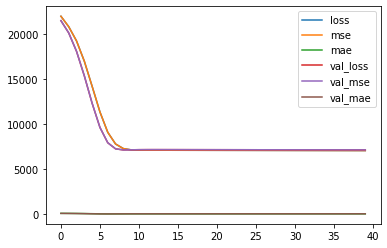

In [139]:

model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [141]:
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=pq
sample[['Date','Time','Week']]=qp
sample.head(3)

24/24 [==============================] - 0s 6ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,Predict,Actual,Date,Time,Week
0,132.452576,94,4.03,11.2,7.0
1,133.742050,81,4.03,11.4,7.0
2,137.610458,71,4.03,12.0,7.0
